In [143]:
import numpy as np
import pandas as pd

import re
import spacy

from sklearn.model_selection import train_test_split

In [144]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [146]:
from spacy.lang.en.stop_words import STOP_WORDS

In [147]:
pd.set_option('display.max_colwidth', None)

In [148]:
nlp = spacy.load('en_core_web_sm')

In [149]:
#load the dataset
df = pd.read_csv("IMDB Dataset.csv")

In [150]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [151]:
df.shape

(50000, 2)

In [152]:
#Remove unecessary characters

In [153]:
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [154]:
df.iloc[0]

review       One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br I would say the main appeal of the show is due to the fact that it goes where other shows wou

In [155]:
# convert all text to lowercase
df['review'] = df['review'].apply(lambda x: x.lower())

In [156]:
df.iloc[0]

review       one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wou

In [157]:
#Remove stop words
stop_words = set(STOP_WORDS)
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [158]:
#Process the clean text using spacy
docs = list(nlp.pipe(df['review'], batch_size = 1000))

In [159]:
len(docs)

50000

In [160]:
# Convert all text to lowercase
df['review'] = df['review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(STOP_WORDS)
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Process the cleaned text data using spacy
docs = list(nlp.pipe(df['review'], batch_size=1000))

In [161]:
# Count the number of tokens in each doc

n_tokens = [len(doc) for doc in docs]
print(f"Total counts in all the documents {sum(n_tokens)}")

Total counts in all the documents 5518595


In [162]:
# number of sentences in each doc
n_sentences = [len(list(doc.sents)) for doc in docs]

In [163]:
# print the first sentence of the second doc
list(list(docs)[1].sents)[0]

wonderful little production br br filming technique unassuming oldtimebbc fashion gives comforting discomforting sense realism entire piece br br actors extremely chosen michael sheen got polari voices pat truly seamless editing guided references williams diary entries worth watching terrificly written performed piece masterful production great masters comedy life br br realism comes home little things fantasy guard use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating surface terribly

In [164]:
for token in list(list(docs)[0].sents)[0]:
    print(f"{token.text:{8}} {token.pos_:{10}} {token.tag:{20}} {token.lemma_:{35}}")

reviewers NOUN         783433942507015291 reviewer                           
mentioned VERB       17109001835818727656 mention                            
watching VERB        1534113631682161808 watch                              
1        NUM         8427216679587749980 1                                  
oz       NOUN       15308085513773655218 oz                                 
episode  NOUN       15308085513773655218 episode                            
you      PRON       13656873538139661788 you                                
ll       AUX        16235386156175103506 ll                                 
hooked   VERB       14200088355797579614 hooked                             
right    ADV          164681854541413346 right                              
exactly  ADV          164681854541413346 exactly                            
happened VERB        3822385049556375858 happen                             
mebr     NOUN       15308085513773655218 mebr                             

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [166]:
vectorizer = TfidfVectorizer(stop_words='english')

In [167]:
df_vector = vectorizer.fit_transform(df['review'])

In [168]:
df_vector.toarray().shape

(50000, 180691)

In [169]:
X, y = df['review'], df['sentiment']

In [170]:
y = y.replace({'positive':1, 'negative':0})

In [171]:
# Train test split data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

In [172]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000,), (10000,), (40000,), (10000,))

In [173]:
vectorizer = TfidfVectorizer(max_features=3500, ngram_range=(1,3))

In [174]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.fit_transform(X_test)

In [175]:
X_train_tfidf.shape, X_test_tfidf.shape

((40000, 3500), (10000, 3500))

## Neural Network Modelling

In [176]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [177]:
import tensorflow


In [184]:
# Defining the model
model = Sequential()
model.add(Dense(20, input_shape = (X_train_tfidf.shape[1],), activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='relu'))

#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [185]:
callbacks_list = [keras.callbacks.ModelCheckpoint(
                                    filepath ='model',
                                    monitor='val_loss',
                                    save_best_only=True,
                                    verbose=1),
                 keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=10, 
                                               verbose=1)]

In [186]:
history = model.fit(X_train_tfidf.toarray(), y_train,
                   epochs=20,
                   verbose=1, 
                   callbacks=callbacks_list,
                   validation_data = (X_test_tfidf.toarray(), y_test))

Epoch 1/20
1194/1250 [===========================>..] - ETA: 0s - loss: 0.4987 - accuracy: 0.7930
Epoch 1: val_loss improved from inf to 1.32775, saving model to model
INFO:tensorflow:Assets written to: model/assets
1250/1250 [==============================] - 1s 875us/step - loss: 0.4918 - accuracy: 0.7970 - val_loss: 1.3278 - val_accuracy: 0.5614
Epoch 2/20
1155/1250 [==========================>...] - ETA: 0s - loss: 0.3712 - accuracy: 0.8802
Epoch 2: val_loss did not improve from 1.32775
1250/1250 [==============================] - 1s 613us/step - loss: 0.3759 - accuracy: 0.8791 - val_loss: 1.8248 - val_accuracy: 0.5606
Epoch 3/20
1172/1250 [===========================>..] - ETA: 0s - loss: 0.3527 - accuracy: 0.8867
Epoch 3: val_loss did not improve from 1.32775
1250/1250 [==============================] - 1s 604us/step - loss: 0.3540 - accuracy: 0.8861 - val_loss: 1.9582 - val_accuracy: 0.5567
Epoch 4/20
1186/1250 [===========================>..] - ETA: 0s - loss: 0.3371 - accuracy

In [181]:
import matplotlib.pyplot as plt

In [182]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

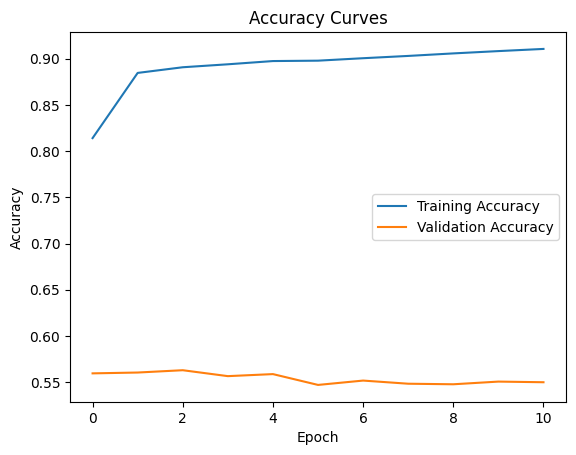

In [183]:
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()